# K-Means Algorithim and Principal Component Analysis

#### AI Saturday Lagos Begineers Class (Instructors: `Tejumade Afonja`, `Kenechi Dukor`)
This exercise is adopted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning)

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import linalg

## K-Means Alogrithim

### Implementing K-Means from Scratch

### Loading Data

In [115]:
X = loadmat('data/ex7data2.mat')['X']

In [116]:
X.shape

(300, 2)

### Data Visualization

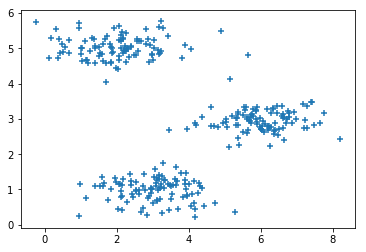

In [117]:
plt.scatter(X[:,0],X[:,1], marker='+')

### Define Function to Implement K-Means

In [118]:
'''
X : examples
k : no of clusters/centroids
x : centroids
'''
def initialize_centroid(X, k):
    '''
    initialize k centroids
    '''
    i = np.random.choice(X.shape[0], k) # This will return 3 random index positions on the dataset
    x = X[i] # we set the three random positions to be the centroids
    return x

def plot_centroid(X, x):
    '''
    scatter plot of centroids and examples
    
    '''
    plt.scatter(X[:,0],X[:,1], marker='+')
    plt.scatter(x[:,0],x[:,1], color='r')
    
def get_closer_exam(X,x):
    '''
    Obtain examples that are closer to each centroid
    '''
    c = []
    for i in range(X.shape[0]):
        pos = np.argmin(np.sqrt(np.sum((X[i] - x)**2, axis=1))) # argmin returns the position of the samallest value in the array
        c.append(pos)
    return c
        
def move_cent(X, c):
    '''
    move the centroids position closer to its clustering examples
    '''
    for i in range(3):
        x[i] = (1.0/X[np.array(c) == i].shape[0])*np.sum(X[np.array(c) == i], axis = 0)
    return x

def plt_cluster(X,x, c):
    '''
    plot all clusters
    '''
    for i in range(3):
        plt.scatter(X[np.array(c)==i][:,0], X[np.array(c)==i][:,1], marker='+')
        plt.scatter(x[:,0],x[:,1], color='r')

def distortion(X, x, c):
    '''
    A measure of how well the clusters are formed
    '''
    distances = []
    for i in range(x.shape[0]):
        dis = (1.0/X[np.array(c) == i].shape[0])*np.sum(np.sqrt(np.sum((X[np.array(c) == i]-x[i])**2, axis=1)))
        distances.append(dis)
    
    return distances, (1.0/len(distances))*np.sum(np.array(distances))

### Traning / Test

initialize centroids positions

In [119]:
x = initialize_centroid(X,3)

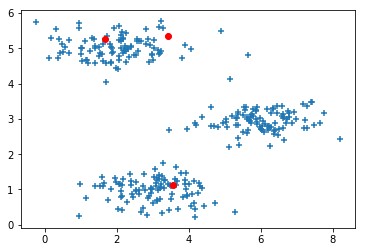

In [120]:
plot_centroid(X, x)

find examples closer to each centroid

In [121]:
c = get_closer_exam(X, x)

move each centroid position based on it clusters

In [122]:
x = move_cent(X, c)

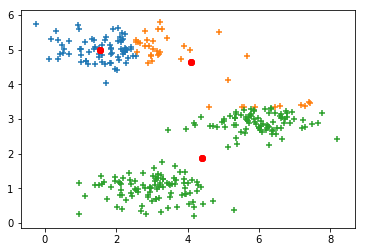

In [123]:
plt_cluster(X, x,  c)

obtain the distortion

In [124]:
dists, dist = distortion(X,x,c)

In [125]:
dist

1.3596221520745146

This steps are usually performed iteratively

In [126]:
k = 3
x = initCent(X, k)
distorts = []
for i in range(10):
    c = get_closer_exam(X, x)
    _, dist = distortion(X, x, c)
    distorts.append(dist)
    x = move_cent(X, c)

In [127]:
distorts

[1.2991709049070606,
 0.8063034486249034,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536]

plot of distortion at each iteration step

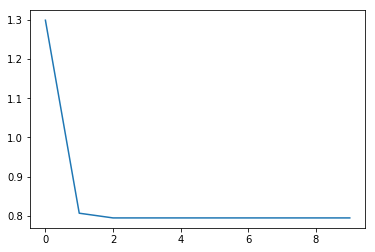

In [128]:
plt.plot(range(len(distorts)), distorts)

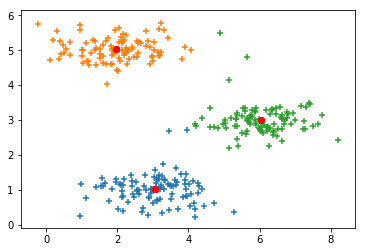

In [129]:
plt_cluster(X,x,c)

### Faster

In [18]:
data1 = loadmat('data/ex7data2.mat')

In [19]:
X1 = data1['X']
print('X1:', X1.shape)

X1: (300, 2)


In [106]:
km1 = KMeans(3)
km1.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [136]:
km1.cluster_centers_

array([[3.04367119, 1.01541041],
       [6.03366736, 3.00052511],
       [1.95399466, 5.02557006]])

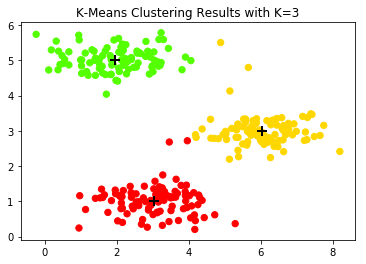

In [137]:
plt.scatter(X1[:,0], X1[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
plt.title('K-Means Clustering Results with K=3')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

#### Image compression with K-means

In [22]:
img = plt.imread('data/bird_small.png')
img_shape = img.shape
img_shape

(128, 128, 3)

In [23]:
A = img/255

In [24]:
AA = A.reshape(128*128,3)
AA.shape

(16384, 3)

In [130]:
km2 = KMeans(16)
km2.fit(AA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [131]:
B = km2.cluster_centers_[km2.labels_].reshape(img_shape[0], img_shape[1], 3)

In [132]:
km2.labels_

array([0, 0, 0, ..., 1, 1, 1])

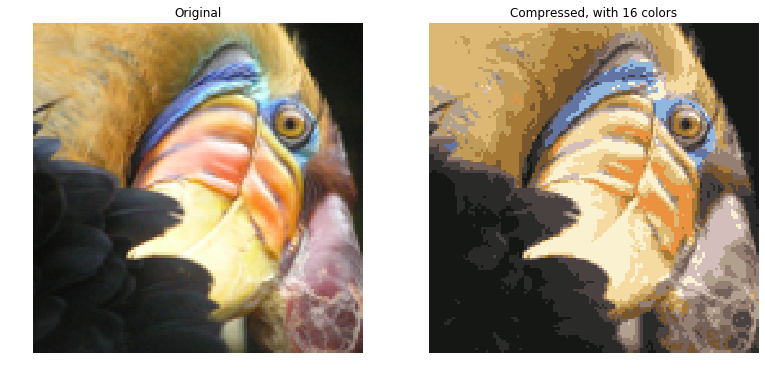

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(B*255)
ax2.set_title('Compressed, with 16 colors')

for ax in fig.axes:
    ax.axis('off')

### PCA on example data set

Using scipy instead of scikit-learn

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn import neighbors, datasets

import pylab as pl

seaborn.set()

iris = datasets.load_iris()

X, y = iris.data, iris.target
from sklearn.decomposition import PCA

Reduced dataset shape: (150, 2)
Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


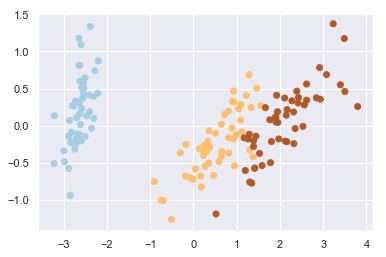

In [46]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='Paired')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

In [48]:
# pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])


### Dimensionality Reduction: Principal Component Analysis in-depth
Here we'll explore Principal Component Analysis, which is an extremely useful linear dimensionality reduction technique. Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. Look for directions in the data with the most variance.

Useful to explore data, visualize data and relationships.

It's easiest to visualize by looking at a two-dimensional dataset:

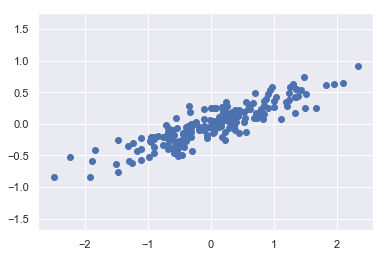

In [50]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');


In [51]:
X.shape

(200, 2)


We can see that there is a definite trend in the data. What PCA seeks to do is to find the Principal Axes in the data, and explain how important those axes are in describing the data distribution:

In [52]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


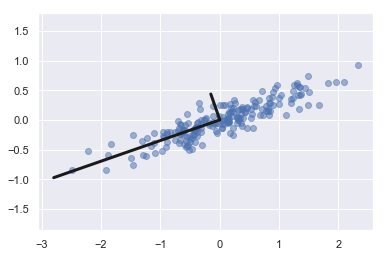

In [59]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction. The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be completely ignored without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [61]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)



Isomap: manifold learning, good when PCA doesn't work like in a loop. Large number of datasets, can use randomized PCA.

By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

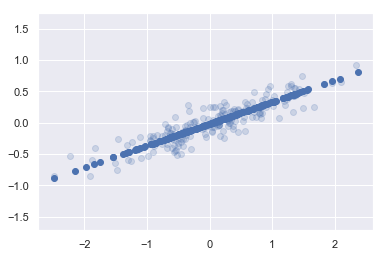

In [62]:

X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.